# ** plotting average data** 
- sliding window (multiple sims with smae DNO_gen0)
- verage mut and triplet freq chnage (multiple sims with smae DNO_gen0)

** imports and global object creation ** 

In [2]:
import matplotlib.pyplot as plt
import numpy
import json
import numpy.random
import copy
import numpy as np 
from datetime import datetime #for plotting 

In [3]:
plt.style.use("seaborn-darkgrid")

In [4]:
#initial half model 
model = {'AAG': [0.35645079041305455, {'ATG': 0.15259895088221268, 'ACG': 0.2341440152598951, 'AGG': 0.6132570338578922}], 'GAC': [0.38170347003154576, {'GGC': 0.581267217630854, 'GCC': 0.17447199265381083, 'GTC': 0.24426078971533516}], 'TCA': [0.44338655339094774, {'TGA': 0.2484307895606211, 'TTA': 0.6247109349190618, 'TAA': 0.12685827552031714}], 'CCA': [0.4589957500393515, {'CAA': 0.10185185185185185, 'CTA': 0.6903292181069959, 'CGA': 0.20781893004115226}], 'GCC': [0.5527913809990206, {'GGC': 0.1630049610205528, 'GAC': 0.23848334514528702, 'GTC': 0.5985116938341601}], 'CCT': [0.5123493090267568, {'CTT': 0.6662840746054519, 'CGT': 0.22955523672883785, 'CAT': 0.10416068866571017}], 'GCA': [0.49819102749638206, {'GGA': 0.15359477124183007, 'GTA': 0.6016702977487292, 'GAA': 0.24473493100944083}], 'TAA': [0.3860215053763441, {'TGA': 0.5678471945881417, 'TTA': 0.22682053322721846, 'TCA': 0.20533227218463987}], 'ACT': [0.5261127596439169, {'AGT': 0.24844895657078397, 'AAT': 0.1551043429216018, 'ATT': 0.5964467005076142}], 'TAT': [0.544423228125351, {'TCT': 0.07654219104600785, 'TGT': 0.8021456571074892, 'TTT': 0.12131215184650299}], 'CAG': [0.4073735527117611, {'CGG': 0.6428571428571429, 'CCG': 0.20905011219147346, 'CTG': 0.1480927449513837}], 'AAA': [0.3198252625708709, {'AGA': 0.5239755884917175, 'ATA': 0.17988956698634118, 'ACA': 0.2961348445219413}], 'CCG': [0.943577893317928, {'CAG': 0.01, 'CGG': 0.04673469387755102, 'CTG': 0.943265306122449}], 'CAA': [0.36173285198555954, {'CCA': 0.28493013972055886, 'CTA': 0.13822355289421157, 'CGA': 0.5768463073852296}], 'ACA': [0.5516478655164787, {'AGA': 0.17802726543704891, 'ATA': 0.6555733761026463, 'AAA': 0.16639935846030474}], 'GCT': [0.5081906865451868, {'GAT': 0.16334661354581673, 'GGT': 0.20101412531691415, 'GTT': 0.6356392611372691}], 'CAC': [0.3995351785336996, {'CCC': 0.20359598096245374, 'CTC': 0.18244315177154943, 'CGC': 0.6139608672659969}], 'ACG': [0.9583888149134487, {'ATG': 0.922542549496353, 'AAG': 0.04341785342132685, 'AGG': 0.03403959708232025}], 'GAG': [0.3202682875707399, {'GTG': 0.23036649214659685, 'GGG': 0.5530104712041884, 'GCG': 0.21662303664921467}], 'AAT': [0.48758198043221157, {'ACT': 0.1133406835722161, 'AGT': 0.7592061742006616, 'ATT': 0.1274531422271224}], 'GCG': [0.9428571428571428, {'GTG': 0.9054178145087236, 'GGG': 0.027548209366391185, 'GAG': 0.06703397612488522}], 'CCC': [0.5453669813138123, {'CTC': 0.6450017661603674, 'CAC': 0.11974567290709998, 'CGC': 0.2352525609325327}], 'ACC': [0.6345660930062248, {'ATC': 0.532602423542989, 'AAC': 0.3147720715522216, 'AGC': 0.15262550490478938}], 'TCT': [0.4717741935483871, {'TGT': 0.34816490698843644, 'TAT': 0.1757164404223228, 'TTT': 0.47611865258924085}], 'TCG': [0.9197916666666667, {'TGG': 0.052095130237825596, 'TAG': 0.026896942242355604, 'TTG': 0.9210079275198187}], 'AAC': [0.3978541712283775, {'AGC': 0.6692350027517887, 'ACC': 0.17776554760594387, 'ATC': 0.15299944964226747}], 'GAT': [0.4466903598400711, {'GCT': 0.11636001989060167, 'GGT': 0.5862754848334162, 'GTT': 0.2973644952759821}], 'TAG': [0.38808618504435993, {'TGG': 0.6962769431743958, 'TCG': 0.16525146962769433, 'TTG': 0.13847158719790986}], 'GAA': [0.30323054331864907, {'GGA': 0.5617433414043583, 'GTA': 0.19915254237288135, 'GCA': 0.2391041162227603}], 'CAT': [0.5741935483870968, {'CGT': 0.716724286949006, 'CTT': 0.1497407087294728, 'CCT': 0.13353500432152118}], 'TCC': [0.5196784458214705, {'TGC': 0.22687721559780857, 'TTC': 0.602964872703835, 'TAC': 0.17015791169835642}], 'TAC': [0.4143262045864468, {'TGC': 0.7276119402985075, 'TTC': 0.1455223880597015, 'TCC': 0.12686567164179105}]}
#doubled model 
model = {'GTC': [0.38170347003154576, {'GCC': 0.581267217630854, 'GGC': 0.17447199265381083, 'GAC': 0.24426078971533516}], 'TGA': [0.44338655339094774, {'TAA': 0.6247109349190618, 'TTA': 0.12685827552031714, 'TCA': 0.2484307895606211}], 'TAT': [0.544423228125351, {'TTT': 0.12131215184650299, 'TGT': 0.8021456571074892, 'TCT': 0.07654219104600785}], 'CGC': [0.9428571428571428, {'CTC': 0.06703397612488522, 'CCC': 0.027548209366391185, 'CAC': 0.9054178145087236}], 'ATT': [0.48758198043221157, {'AGT': 0.1133406835722161, 'ACT': 0.7592061742006616, 'AAT': 0.1274531422271224}], 'GCA': [0.49819102749638206, {'GTA': 0.6016702977487292, 'GAA': 0.24473493100944083, 'GGA': 0.15359477124183007}], 'CGT': [0.9583888149134487, {'CTT': 0.04341785342132685, 'CCT': 0.03403959708232025, 'CAT': 0.922542549496353}], 'CCA': [0.4589957500393515, {'CTA': 0.6903292181069959, 'CGA': 0.20781893004115226, 'CAA': 0.10185185185185185}], 'GGA': [0.5196784458214705, {'GTA': 0.17015791169835642, 'GAA': 0.602964872703835, 'GCA': 0.22687721559780857}], 'AAA': [0.3198252625708709, {'ACA': 0.2961348445219413, 'ATA': 0.17988956698634118, 'AGA': 0.5239755884917175}], 'AAC': [0.3978541712283775, {'ACC': 0.17776554760594387, 'AGC': 0.6692350027517887, 'ATC': 0.15299944964226747}], 'CTC': [0.3202682875707399, {'CGC': 0.21662303664921467, 'CCC': 0.5530104712041884, 'CAC': 0.23036649214659685}], 'AGG': [0.5123493090267568, {'ACG': 0.22955523672883785, 'AAG': 0.6662840746054519, 'ATG': 0.10416068866571017}], 'AGA': [0.4717741935483871, {'ACA': 0.34816490698843644, 'AAA': 0.47611865258924085, 'ATA': 0.1757164404223228}], 'AGC': [0.5081906865451868, {'ACC': 0.20101412531691415, 'AAC': 0.6356392611372691, 'ATC': 0.16334661354581673}], 'CAA': [0.36173285198555954, {'CTA': 0.13822355289421157, 'CGA': 0.5768463073852296, 'CCA': 0.28493013972055886}], 'CTT': [0.35645079041305455, {'CGT': 0.2341440152598951, 'CCT': 0.6132570338578922, 'CAT': 0.15259895088221268}], 'CAC': [0.3995351785336996, {'CCC': 0.20359598096245374, 'CTC': 0.18244315177154943, 'CGC': 0.6139608672659969}], 'TAG': [0.38808618504435993, {'TCG': 0.16525146962769433, 'TGG': 0.6962769431743958, 'TTG': 0.13847158719790986}], 'ACA': [0.5516478655164787, {'ATA': 0.6555733761026463, 'AGA': 0.17802726543704891, 'AAA': 0.16639935846030474}], 'CTG': [0.4073735527117611, {'CGG': 0.20905011219147346, 'CAG': 0.1480927449513837, 'CCG': 0.6428571428571429}], 'ACT': [0.5261127596439169, {'AGT': 0.24844895657078397, 'ATT': 0.5964467005076142, 'AAT': 0.1551043429216018}], 'TTA': [0.3860215053763441, {'TGA': 0.20533227218463987, 'TAA': 0.22682053322721846, 'TCA': 0.5678471945881417}], 'CGA': [0.9197916666666667, {'CTA': 0.026896942242355604, 'CAA': 0.9210079275198187, 'CCA': 0.052095130237825596}], 'GTA': [0.4143262045864468, {'GGA': 0.12686567164179105, 'GAA': 0.1455223880597015, 'GCA': 0.7276119402985075}], 'GGC': [0.5527913809990206, {'GCC': 0.1630049610205528, 'GTC': 0.23848334514528702, 'GAC': 0.5985116938341601}], 'AGT': [0.5261127596439169, {'ATT': 0.1551043429216018, 'ACT': 0.24844895657078397, 'AAT': 0.5964467005076142}], 'AAT': [0.48758198043221157, {'AGT': 0.7592061742006616, 'ATT': 0.1274531422271224, 'ACT': 0.1133406835722161}], 'CCG': [0.943577893317928, {'CTG': 0.943265306122449, 'CGG': 0.04673469387755102, 'CAG': 0.01}], 'ACC': [0.6345660930062248, {'AAC': 0.3147720715522216, 'ATC': 0.532602423542989, 'AGC': 0.15262550490478938}], 'TCC': [0.5196784458214705, {'TTC': 0.602964872703835, 'TGC': 0.22687721559780857, 'TAC': 0.17015791169835642}], 'TCT': [0.4717741935483871, {'TTT': 0.47611865258924085, 'TGT': 0.34816490698843644, 'TAT': 0.1757164404223228}], 'CAG': [0.4073735527117611, {'CTG': 0.1480927449513837, 'CGG': 0.6428571428571429, 'CCG': 0.20905011219147346}], 'TTG': [0.36173285198555954, {'TCG': 0.5768463073852296, 'TGG': 0.28493013972055886, 'TAG': 0.13822355289421157}], 'ATC': [0.4466903598400711, {'ACC': 0.5862754848334162, 'AAC': 0.2973644952759821, 'AGC': 0.11636001989060167}], 'CGG': [0.943577893317928, {'CTG': 0.01, 'CAG': 0.943265306122449, 'CCG': 0.04673469387755102}], 'TTC': [0.30323054331864907, {'TGC': 0.2391041162227603, 'TCC': 0.5617433414043583, 'TAC': 0.19915254237288135}], 'TAA': [0.3860215053763441, {'TGA': 0.5678471945881417, 'TTA': 0.22682053322721846, 'TCA': 0.20533227218463987}], 'ATG': [0.5741935483870968, {'ACG': 0.716724286949006, 'AAG': 0.1497407087294728, 'AGG': 0.13353500432152118}], 'GGT': [0.6345660930062248, {'GTT': 0.3147720715522216, 'GCT': 0.15262550490478938, 'GAT': 0.532602423542989}], 'TGC': [0.49819102749638206, {'TTC': 0.24473493100944083, 'TCC': 0.15359477124183007, 'TAC': 0.6016702977487292}], 'GTG': [0.3995351785336996, {'GAG': 0.18244315177154943, 'GCG': 0.6139608672659969, 'GGG': 0.20359598096245374}], 'GGG': [0.5453669813138123, {'GAG': 0.6450017661603674, 'GTG': 0.11974567290709998, 'GCG': 0.2352525609325327}], 'ACG': [0.9583888149134487, {'ATG': 0.922542549496353, 'AAG': 0.04341785342132685, 'AGG': 0.03403959708232025}], 'TGG': [0.4589957500393515, {'TCG': 0.20781893004115226, 'TTG': 0.10185185185185185, 'TAG': 0.6903292181069959}], 'GAA': [0.30323054331864907, {'GTA': 0.19915254237288135, 'GGA': 0.5617433414043583, 'GCA': 0.2391041162227603}], 'GAC': [0.38170347003154576, {'GCC': 0.17447199265381083, 'GTC': 0.24426078971533516, 'GGC': 0.581267217630854}], 'TAC': [0.4143262045864468, {'TTC': 0.1455223880597015, 'TGC': 0.7276119402985075, 'TCC': 0.12686567164179105}], 'GAT': [0.4466903598400711, {'GTT': 0.2973644952759821, 'GCT': 0.11636001989060167, 'GGT': 0.5862754848334162}], 'ATA': [0.544423228125351, {'ACA': 0.8021456571074892, 'AAA': 0.12131215184650299, 'AGA': 0.07654219104600785}], 'GCT': [0.5081906865451868, {'GTT': 0.6356392611372691, 'GGT': 0.20101412531691415, 'GAT': 0.16334661354581673}], 'CAT': [0.5741935483870968, {'CTT': 0.1497407087294728, 'CGT': 0.716724286949006, 'CCT': 0.13353500432152118}], 'CTA': [0.38808618504435993, {'CGA': 0.16525146962769433, 'CAA': 0.13847158719790986, 'CCA': 0.6962769431743958}], 'CCT': [0.5123493090267568, {'CTT': 0.6662840746054519, 'CGT': 0.22955523672883785, 'CAT': 0.10416068866571017}], 'TTT': [0.3198252625708709, {'TCT': 0.5239755884917175, 'TGT': 0.2961348445219413, 'TAT': 0.17988956698634118}], 'TCG': [0.9197916666666667, {'TGG': 0.052095130237825596, 'TTG': 0.9210079275198187, 'TAG': 0.026896942242355604}], 'AAG': [0.35645079041305455, {'ATG': 0.15259895088221268, 'ACG': 0.2341440152598951, 'AGG': 0.6132570338578922}], 'GTT': [0.3978541712283775, {'GCT': 0.6692350027517887, 'GGT': 0.17776554760594387, 'GAT': 0.15299944964226747}], 'TCA': [0.44338655339094774, {'TAA': 0.12685827552031714, 'TGA': 0.2484307895606211, 'TTA': 0.6247109349190618}], 'CCC': [0.5453669813138123, {'CTC': 0.6450017661603674, 'CGC': 0.2352525609325327, 'CAC': 0.11974567290709998}], 'GAG': [0.3202682875707399, {'GTG': 0.23036649214659685, 'GCG': 0.21662303664921467, 'GGG': 0.5530104712041884}], 'GCG': [0.9428571428571428, {'GAG': 0.06703397612488522, 'GTG': 0.9054178145087236, 'GGG': 0.027548209366391185}], 'GCC': [0.5527913809990206, {'GTC': 0.5985116938341601, 'GGC': 0.1630049610205528, 'GAC': 0.23848334514528702}], 'TGT': [0.5516478655164787, {'TCT': 0.17802726543704891, 'TAT': 0.6555733761026463, 'TTT': 0.16639935846030474}]}


In [7]:
file_path_initial = "../Old_workbooks_scripting/Scripting_data/"
sim_name_initial = "Files_to_use_for_parallel"

file_path_afterSim = ""
sim_name_afterSim = "Parallel_Trial"

about_sim = "_cds_invariant50"
nTrials = 12

In [8]:
cds_pos_dictionary = open(file_path_initial+sim_name_initial+"_exon_insertion_dict.txt").readlines()[0]
cds_pos_dictionary = json.loads(cds_pos_dictionary)
cds_seq_dictionary = open(file_path_initial+sim_name_initial+"_exons_toUseSeqeunce_dict.txt").readlines()[0]
cds_seq_dictionary = json.loads(cds_seq_dictionary)

In [9]:
file_name = "Files_to_use_for_parallel_DNA_gen0_cds.txt"
DNAI = open(file_path_initial+file_name).readlines()[0]

In [10]:
DNAF_dataDict = {}
#note I want the dna string to be an entry in the list value fo the DNAF dictionary so i can add weigths later 
for index_tmp in range(1,nTrials+1):
    file_name = sim_name_afterSim+str(index_tmp)+"_DNA_final"+about_sim+".txt"
    DNAF_dataDict["Trial"+str(index_tmp)] = open(file_path_afterSim+file_name).readlines()[0]

In [11]:
len(DNAF_dataDict["Trial1"])

100145

In [12]:
weights_initial = []
for i in range(1,len(DNAI)-1): # dont want it to run all the way to the end: need to -1 so last centre index is second last in DNA string 
    if (DNAI[i-1:i+2]) in model: 
        weights_initial.append(model[(DNAI[i-1:i+2])][0])
    else: 
        weights_initial.append(model[reverse_complement(DNAI[i-1:i+2])][0])


In [14]:
cpg_muts = []
for key, value in model.items(): 
    if value[0] >= 0.8 : 
        print(key, value[0])
        cpg_muts.append(value[0])

CGC 0.9428571428571428
CGA 0.9197916666666667
ACG 0.9583888149134487
TCG 0.9197916666666667
GCG 0.9428571428571428
CGG 0.943577893317928
CCG 0.943577893317928
CGT 0.9583888149134487


In [16]:
weights_initial_noCpg = []
cpg_initial_counter = 0
for index, weight in enumerate(weights_initial):  
    if weight in cpg_muts: 
        cpg_initial_counter += 1
        weights_initial_noCpg.append(0.45)
    else: 
        weights_initial_noCpg.append(weight)
        

In [18]:
print(weights_initial[0:20])

[0.943577893317928, 0.5527913809990206, 0.5527913809990206, 0.5453669813138123, 0.943577893317928, 0.9197916666666667, 0.30323054331864907, 0.3978541712283775, 0.5516478655164787, 0.3995351785336996, 0.9583888149134487, 0.9583888149134487, 0.4143262045864468, 0.38808618504435993, 0.5261127596439169, 0.4143262045864468, 0.38808618504435993, 0.5261127596439169, 0.3995351785336996, 0.4589957500393515]


# ** getting average winodw value for each sample, then averaging/sd across samples ** 

ok start witht eh DNAF dadt dictionary 

In [13]:
DNAF_dataDict_noCPGMuts = {}
for key, value in DNAF_dataDict.items(): 
    DNAF_dataDict_noCPGMuts[key] = [value]

In [15]:
# want to append the list of muts to each dnaf entry in dictionary 
for trial_number in range(1,nTrials): 
    trial_name = "Trial"+str(trial_number)
    trial_muts = []
    for index in range(1,len(DNAI)-1): 
        triplet = DNAF_dataDict[trial_name][index-1:index+2]

#nomral with CpGs
        mut =   model[triplet][0] 
        
# if you want no CpGs 
#         if model[triplet][0] in cpg_muts: 
#             mut = 0.45
#         else: 
#             mut = model[triplet][0]

        trial_muts.append(mut)
    DNAF_dataDict_noCPGMuts[trial_name].append(trial_muts)

In [39]:
window_size = 1000

In [40]:
sliding_window_X = []

for i in range(0,len(DNAI), window_size):                                  # 1[len(dnai)] iterating by window size 
    if len(DNAI) - i > window_size:                                        # if you're not RIGHT at the end 
        sliding_window_X.append(i+int(window_size/2)) 

In [41]:
# now want to append every average window mut value to the dnafplus dict 

for trial_number in range(1,nTrials): 
    trial_name = "Trial"+str(trial_number)
    
    trial_muts_list = []
    for i in range(0,len(DNAI), window_size):
        if len(DNAI) - i > window_size: 
            
            av_mut = np.mean(DNAF_dataDict_noCPGMuts[trial_name][1][i:i+window_size])
            trial_muts_list.append(av_mut)
                
        else: 
            print("size of omitted section is : "+str(len(DNAI)-i))
    DNAF_dataDict_noCPGMuts[trial_name].append(trial_muts_list)
    

size of omitted section is : 145
size of omitted section is : 145
size of omitted section is : 145
size of omitted section is : 145
size of omitted section is : 145
size of omitted section is : 145
size of omitted section is : 145
size of omitted section is : 145
size of omitted section is : 145
size of omitted section is : 145
size of omitted section is : 145


In [42]:
# creating the average muts and std list 
sliding_window_avMut = []
sliding_window_SE = []


nwindows = len(DNAF_dataDict_noCPGMuts["Trial1"][2])

for i in range(0,nwindows):
    window_muts = []
    
    
    
    for trial_number in range(1,nTrials): 
        trial_name = "Trial"+str(trial_number)
        window_muts.append(DNAF_dataDict_noCPGMuts[trial_name][2][i])
        
        
    
#     print(window_muts)
#     print(np.mean(window_muts))
#     print(np.std(window_muts)/np.sqrt(nTrials))
    
    
#     break 

    
    sliding_window_avMut.append(np.mean(window_muts))
    sliding_window_SE.append(np.std(window_muts)/np.sqrt(nTrials))
    

In [ ]:
DNAI

In [29]:
initial_weights = []
for index in range(1,len(DNAI)-1): 
    triplet = DNAI[index-1:index+2]
    initial_weights.append(model[triplet][0])

sliding_window_initial = []
for i in range(0,nwindows): 
    start_index = i*window_size+window_size
    sliding_window_initial.append(np.mean(initial_weights[start_index: start_index+window_size]))

In [30]:
sliding_window_initial[0:10]

[0.51961406819420164,
 0.52191764428967469,
 0.51024691680789591,
 0.50320881252186178,
 0.50360321364373273,
 0.50714819474095696,
 0.47311824224299037,
 0.44470810489839224,
 0.44718175876153871,
 0.45498300525771779]

In [31]:
print(sliding_window_avMut[0:8])
print(sliding_window_SE[0:8])

[0.47900041662754683, 0.47930286542544298, 0.47831154125061759, 0.48000353521147843, 0.47757581574056401, 0.47945290631187876, 0.48020544607366006, 0.47869923689879351]
[0.0014810626655821098, 0.0014572556269879884, 0.0019609314738221581, 0.0021937506647602988, 0.001568822680739536, 0.00089848280006150287, 0.0020472084563486854, 0.0015984158924570425]


In [43]:
sliding_aboveError = numpy.array(sliding_window_avMut)+numpy.array(sliding_window_SE)
sliding_belowError = numpy.array(sliding_window_avMut)-numpy.array(sliding_window_SE)
print(type(sliding_belowError))
print(type(sliding_aboveError))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [44]:
#do a double check after file imports 
for gene_id, gene_value in cds_seq_dictionary.items():     
    if DNAI.find(gene_value[0]) != cds_pos_dictionary[gene_id][0]+1: 
        print("ERROR: cds_pos_dict not accurate for this dna for "+gene_id)


In [45]:
cds_pos_list = []
for value in cds_pos_dictionary.values(): 
    cds_pos_list.extend([value[0], value[1]])
cds_pos_list.sort()

In [43]:
sliding_window_chnage = []
for i,j in zip(sliding_window_avMut,sliding_window_initial): 
    sliding_window_chnage.append(i-j)

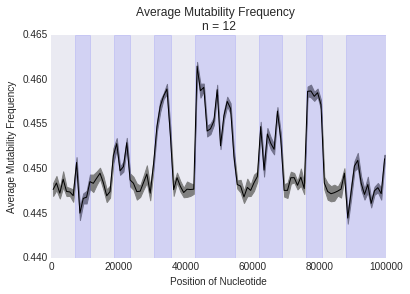

In [46]:
#details you want to be in graph titles
sim_details = "n = 12"

#this chunck is just plotting
fig, ax = plt.subplots()
plt.plot(sliding_window_X, sliding_window_avMut, "k")

#plt.plot(sliding_window_X, sliding_window_initial, "k")

#plt.plot(sliding_window_avMut, sliding_aboveError, "k")
plt.title("Average Mutability Frequency  \n"+sim_details)
plt.xlabel("Position of Nucleotide")
plt.ylabel("Average Mutability Frequency")

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.1, color='blue')
ax.grid(False)
#adding in SD 
plt.fill_between(sliding_window_X,sliding_belowError,sliding_aboveError, color = "grey")

plt.xlim(right=100000)  # adjust the right leaving left unchanged

plt.show()

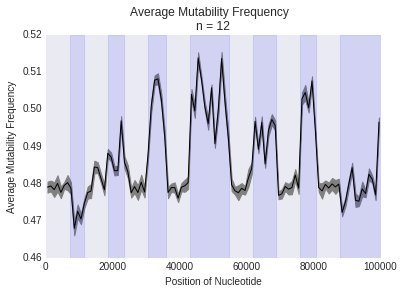

In [49]:
#details you want to be in graph titles
sim_details = "n = 12"

#this chunck is just plotting
fig, ax = plt.subplots()
plt.plot(sliding_window_X, sliding_window_avMut, "k")

#plt.plot(sliding_window_X, sliding_window_initial, "k")

#plt.plot(sliding_window_avMut, sliding_aboveError, "k")
plt.title("Average Mutability Frequency  \n"+sim_details)
plt.xlabel("Position of Nucleotide")
plt.ylabel("Average Mutability Frequency")

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.1, color='blue')
ax.grid(False)
#adding in SD 
plt.fill_between(sliding_window_X,sliding_belowError,sliding_aboveError, color = "grey")

plt.xlim(right=100000)  # adjust the right leaving left unchanged

plt.show()

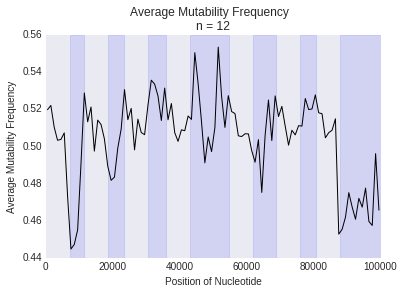

In [54]:
#details you want to be in graph titles
sim_details = "n = 12"

#this chunck is just plotting
fig, ax = plt.subplots()
plt.plot(sliding_window_X, sliding_window_initial, "k")

#plt.plot(sliding_window_X, sliding_window_initial, "k")

#plt.plot(sliding_window_avMut, sliding_aboveError, "k")
plt.title("Average Mutability Frequency  \n"+sim_details)
plt.xlabel("Position of Nucleotide")
plt.ylabel("Average Mutability Frequency")

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.1, color='blue')
ax.grid(False)
#adding in SD 
#plt.fill_between(sliding_window_X,sliding_belowError,sliding_aboveError, color = "grey")

plt.xlim(right=100000)  # adjust the right leaving left unchanged

plt.savefig("Plots/sliding_window_initial_2020_08_14.png")

In [50]:
cds_pos_list

[7141,
 11479,
 18621,
 23421,
 30563,
 35810,
 42952,
 54730,
 61872,
 68859,
 76001,
 80708,
 87850,
 100144]

In [52]:
for index, element in enumerate(cds_pos_list): 
    if index in [0,2,4,6,8,10,12,14]: 
        list_initial_weights_seg = []
        for i in range(element, cds_pos_list[index+1]): 
            triplet = DNAI[i-1: i+2]
            list_initial_weights_seg.append(model[triplet][0])
        print(element, np.mean(list_initial_weights_seg), sep = "\t")

7141	0.453087980895
18621	0.491066545764
30563	0.525743000336
42952	0.518295397897
61872	0.499303339883
76001	0.516646791651
87850	0.468149594082


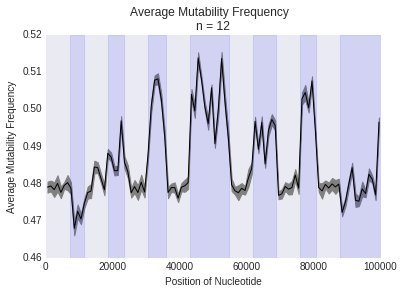

In [35]:
#details you want to be in graph titles
sim_details = "n = 12"

#this chunck is just plotting
fig, ax = plt.subplots()
plt.plot(sliding_window_X, sliding_window_avMut, "k")

#plt.plot(sliding_window_avMut, sliding_aboveError, "k")
plt.title("Average Mutability Frequency  \n"+sim_details)
plt.xlabel("Position of Nucleotide")
plt.ylabel("Average Mutability Frequency")

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.1, color='blue')
ax.grid(False)
#adding in SD 
plt.fill_between(sliding_window_X,sliding_belowError,sliding_aboveError, color = "grey")

plt.xlim(right=100000)  # adjust the right leaving left unchanged

plt.show()

In [36]:
cds_pos_dictionary

{'ENST00000287097.6': [7141, 11479],
 'ENST00000293879.9': [30563, 35810],
 'ENST00000338368.7': [87850, 100144],
 'ENST00000346169.7': [18621, 23421],
 'ENST00000389722.7': [61872, 68859],
 'ENST00000437464.1': [42952, 54730],
 'ENST00000613019.4': [76001, 80708]}

In [37]:
np.mean(initial_weights[7141:11479])

0.45310607055108865

In [38]:
np.mean(initial_weights[7141:11479])

0.45310607055108865

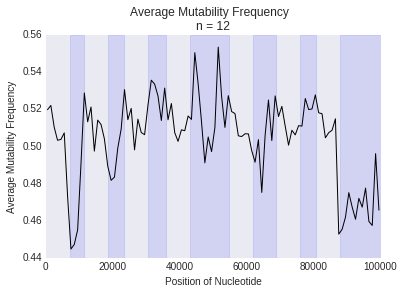

In [39]:
#details you want to be in graph titles
sim_details = "n = 12"

#this chunck is just plotting
fig, ax = plt.subplots()


plt.plot(sliding_window_X, sliding_window_initial, "k")

#plt.plot(sliding_window_avMut, sliding_aboveError, "k")
plt.title("Average Mutability Frequency  \n"+sim_details)
plt.xlabel("Position of Nucleotide")
plt.ylabel("Average Mutability Frequency")

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.1, color='blue')
ax.grid(False)
#adding in SD 
#plt.fill_between(sliding_window_X,sliding_belowError,sliding_aboveError, color = "grey")

plt.xlim(right=100000)  # adjust the right leaving left unchanged

plt.show()

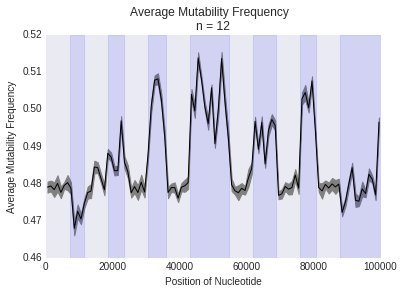

In [164]:
#details you want to be in graph titles
sim_details = "n = 12"

#this chunck is just plotting
fig, ax = plt.subplots()
plt.plot(sliding_window_X, sliding_window_avMut, "k")


#plt.plot(sliding_window_avMut, sliding_aboveError, "k")
plt.title("Average Mutability Frequency  \n"+sim_details)
plt.xlabel("Position of Nucleotide")
plt.ylabel("Average Mutability Frequency")

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.1, color='blue')
ax.grid(False)
#adding in SD 
plt.fill_between(sliding_window_X,sliding_belowError,sliding_aboveError, color = "grey")

plt.xlim(right=100000)  # adjust the right leaving left unchanged

plt.show()

In [165]:
cds_pos_dictionary

{'ENST00000287097.6': [7141, 11479],
 'ENST00000293879.9': [30563, 35810],
 'ENST00000338368.7': [87850, 100144],
 'ENST00000346169.7': [18621, 23421],
 'ENST00000389722.7': [61872, 68859],
 'ENST00000437464.1': [42952, 54730],
 'ENST00000613019.4': [76001, 80708]}

# ** trying to get another dna strand; ONE WITHOUT CRAPPY LOW EXONS: SE IF REOCCURING** 

In [138]:
DNAI = open("DifDNA_Trial5_DNA_gen0_cds.txt").readlines()[0]
DNAF = open("DifDNA_Trial5_DNA_final_cds_invariant50.txt").readlines()[0]


In [139]:
counter = 0
initial_weights = []
final_weights = []
for i in range(1,len(DNAI)-1): 
    initial_triplet = DNAI[i-1:i+2]
    initial_weights.append(model[initial_triplet][0])
    final_triplet = DNAF[i-1:i+2]
    final_weights.append(model[final_triplet][0])
    

In [140]:
window_size = 1000

In [141]:
sliding_window_X = []
sliding_window_Y = []

for i in range(0,len(DNAI), window_size):                                  # 1[len(dnai)] iterating by window size 
    if len(DNAI) - i > window_size:                                        # if you're not RIGHT at the end 
        sliding_window_X.append(i+int(window_size/2)) 
        
        tmp_f = final_weights[i:i+window_size]
        
        sliding_window_Y.append(np.mean(tmp_f))

    else: 
        print("size of omitted section is : "+str(len(DNAI)-i))
    
        

size of omitted section is : 186


In [142]:
cds_pos_dictionary = open("DifDNA_Trial5_exon_insertion_dict.txt").readlines()[0]
cds_pos_dictionary = json.loads(cds_pos_dictionary)
cds_seq_dictionary = open("DifDNA_Trial5_exons_toUseSeqeunce_dict.txt").readlines()[0]
cds_seq_dictionary = json.loads(cds_seq_dictionary)

In [143]:
#do a double check after file imports 
for gene_id, gene_value in cds_seq_dictionary.items():     
    if DNAI.find(gene_value[0]) != cds_pos_dictionary[gene_id][0]+1: 
        print("ERROR: cds_pos_dict not accurate for this dna for "+gene_id)


In [144]:
cds_pos_list = []
for value in cds_pos_dictionary.values(): 
    cds_pos_list.extend([value[0], value[1]])
cds_pos_list.sort()

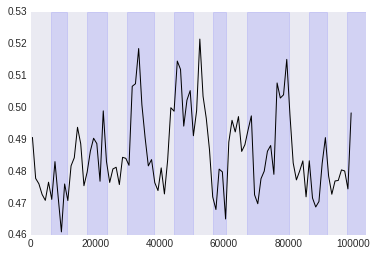

In [71]:
fig, ax = plt.subplots()

plt.plot(sliding_window_X, sliding_window_Y, "k")

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.1, color='blue')
ax.grid(False)
plt.xlim(right=104000) 
plt.show()

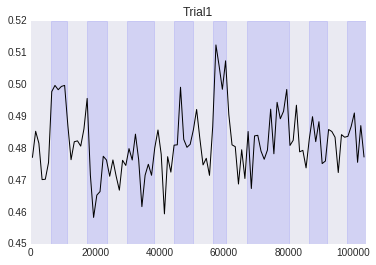

In [112]:
fig, ax = plt.subplots()

plt.plot(sliding_window_X, sliding_window_Y, "k")

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.1, color='blue')
ax.grid(False)
plt.xlim(right=104000)
plt.title("Trial1")
plt.show()

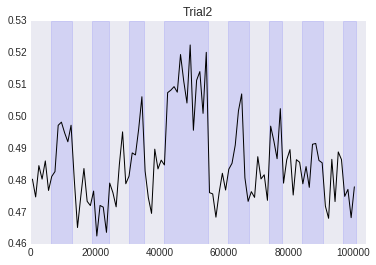

In [120]:
fig, ax = plt.subplots()

plt.plot(sliding_window_X, sliding_window_Y, "k")

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.1, color='blue')
ax.grid(False)
plt.xlim(right=104000)
plt.title("Trial2")
plt.show()

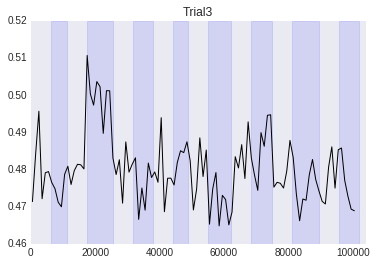

In [128]:
fig, ax = plt.subplots()

plt.plot(sliding_window_X, sliding_window_Y, "k")

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.1, color='blue')
ax.grid(False)
plt.xlim(right=104000)
plt.title("Trial3")
plt.show()

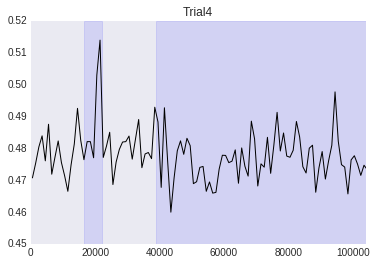

In [136]:
fig, ax = plt.subplots()

plt.plot(sliding_window_X, sliding_window_Y, "k")

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.1, color='blue')
ax.grid(False)
plt.xlim(right=104000)
plt.title("Trial4")
plt.show()

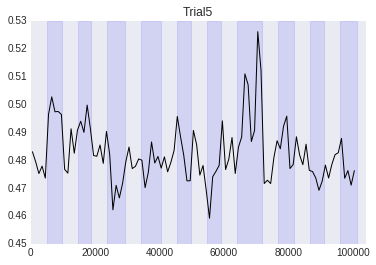

In [145]:
fig, ax = plt.subplots()

plt.plot(sliding_window_X, sliding_window_Y, "k")

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.1, color='blue')
ax.grid(False)
plt.xlim(right=104000)
plt.title("Trial5")
plt.show()

# ** APPENDIX** 

 ** averaged mutabiliy and triplets **

In [189]:
generation = range(1,len(av_mutability_dataDict["Trial7"])+1) 
# note this has to be the shortest length of all the trials 

In [324]:
av_mutability_dataDict = {}
exon_mutability_dataDict = {}
intron_mutability_dataDict = {}

    
for index_tmp in range(1,nTrials+1):
    file_name = sim_name_afterSim+str(index_tmp)+"_exonMut"+about_sim+".txt"
    exon_mutability_dataDict["Trial"+str(index_tmp)] = open(file_path_afterSim+file_name).readlines()[0]
    exon_mutability_dataDict["Trial"+str(index_tmp)] = exon_mutability_dataDict["Trial"+str(index_tmp)].strip("[")
    exon_mutability_dataDict["Trial"+str(index_tmp)] = exon_mutability_dataDict["Trial"+str(index_tmp)].strip("]")
    exon_mutability_dataDict["Trial"+str(index_tmp)] = exon_mutability_dataDict["Trial"+str(index_tmp)].split(",")
    exon_mutability_dataDict["Trial"+str(index_tmp)] = [float(value) for value in exon_mutability_dataDict["Trial"+str(index_tmp)]]
    
for index_tmp in range(1,nTrials+1):
    file_name = sim_name_afterSim+str(index_tmp)+"_intronMut"+about_sim+".txt"
    intron_mutability_dataDict["Trial"+str(index_tmp)] = open(file_path_afterSim+file_name).readlines()[0]
    intron_mutability_dataDict["Trial"+str(index_tmp)] = intron_mutability_dataDict["Trial"+str(index_tmp)].strip("[")
    intron_mutability_dataDict["Trial"+str(index_tmp)] = intron_mutability_dataDict["Trial"+str(index_tmp)].strip("]")
    intron_mutability_dataDict["Trial"+str(index_tmp)] = intron_mutability_dataDict["Trial"+str(index_tmp)].split(",")
    intron_mutability_dataDict["Trial"+str(index_tmp)] = [float(value) for value in intron_mutability_dataDict["Trial"+str(index_tmp)]]

for index_tmp in range(1,nTrials+1):
    file_name = sim_name_afterSim+str(index_tmp)+"_avMutability"+about_sim+".txt"
    av_mutability_dataDict["Trial"+str(index_tmp)] = open(file_path_afterSim+file_name).readlines()[0]
    av_mutability_dataDict["Trial"+str(index_tmp)] = av_mutability_dataDict["Trial"+str(index_tmp)].strip("[")
    av_mutability_dataDict["Trial"+str(index_tmp)] = av_mutability_dataDict["Trial"+str(index_tmp)].strip("]")
    av_mutability_dataDict["Trial"+str(index_tmp)] = av_mutability_dataDict["Trial"+str(index_tmp)].split(",")
    av_mutability_dataDict["Trial"+str(index_tmp)] = [float(value) for value in av_mutability_dataDict["Trial"+str(index_tmp)]]



In [325]:
## do the averaging 
globalMutability_averaged = []
for index in range(0,len(generation)): 
    avTrialMut = 0
    for trial_number in range(1,nTrials+1): 
        trial_name = "Trial"+str(trial_number)
        avTrialMut += av_mutability_dataDict[trial_name][index]
        #print(av_mutability_dataDict[trial_name][0])
    avTrialMut = avTrialMut/nTrials
    globalMutability_averaged.append(avTrialMut)

In [326]:
## do the averaging 
exonMutability_averaged = []
exonMutability_SD = []
for index in range(0,len(generation)): 
    avTrialMut = []
    for trial_number in range(1,nTrials+1): 
        trial_name = "Trial"+str(trial_number)
        avTrialMut.append(exon_mutability_dataDict[trial_name][index])
        #print(av_mutability_dataDict[trial_name][0])
    exonMutability_SD.append(numpy.std(avTrialMut))
    exonMutability_averaged.append(numpy.mean(avTrialMut))

In [327]:
## do the averaging 
intronMutability_averaged = []
intronMutability_SD = []
for index in range(0,len(generation)): 
    avTrialMut = []
    for trial_number in range(1,nTrials+1): 
        trial_name = "Trial"+str(trial_number)
        avTrialMut.append(intron_mutability_dataDict[trial_name][index])
        #print(av_mutability_dataDict[trial_name][0])
    intronMutability_SD.append(numpy.std(avTrialMut))
    intronMutability_averaged.append(numpy.mean(avTrialMut))

# PLOTTING 

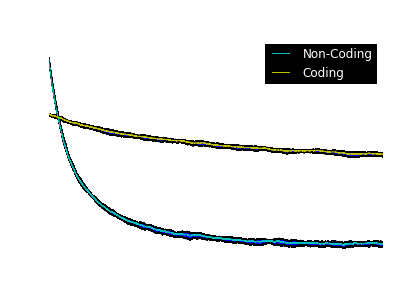

In [411]:
plt.plot(generation, intronMutability_averaged, color = "c",label = "Non-Coding")
plt.plot(generation, exonMutability_averaged, color = "y",label = "Coding")
plt.legend()
plt.title("Average Mutability of Coding and Non-Coding Regions \n"+"same DNA " +sim_details)
plt.xlabel("Generation")
plt.ylabel("Average Mutability")

plt.fill_between(generation, numpy.array(intronMutability_averaged)-numpy.array(intronMutability_SD), numpy.array(intronMutability_averaged)+numpy.array(intronMutability_SD))
plt.fill_between(generation, numpy.array(exonMutability_averaged)-numpy.array(exonMutability_SD), numpy.array(exonMutability_averaged)+numpy.array(exonMutability_SD))
plt.show()

___
# chnage trip freq

In [329]:
triplets = []
sorted_model = []

for key, value in model.items(): 
    triplets.append(key)
    sorted_model.append(value[0])
# does the iterator 

sorted_model, triplets = (list(t) for t in zip(*sorted(zip(sorted_model, triplets))))
#sort the list togetheer (want the mutabilities least--> greatest , but want the triplets to match ) 

fI = weights_initial


In [423]:
# ok here I need to create lsit of triplets for every trial, then count the freq of each triplet within each thingm then average
#--> ok i know it makes more sense to go triplet by triplet, but itll be quciker to go trail by trial 
#--> for each trial make... a list of the occurences of each triplet? (will be in the same order so just work on that)

# sorted model = ascending lsit mutabilities 
# triplets + list al triplets by mutability. 

#PLAN: using th eordered triplet list as iterator 
fF_counts = [0 for i in range(0,len(triplets))]
fF_counts_dict = {}
for triplet in triplets: 
    fF_counts_dict[triplet] = []

for i in range(1,nTrials+1):
    trial_name = "Trial{n}".format(n=i)
    triplets_thisTrial = []
    DNAF_thisTrial = DNAF_dataDict[trial_name]
    
    for site in range(1,len(DNAI)-1): 
        triplets_thisTrial.append(DNAF_thisTrial[site-1:site+2])
    
    for index,triplet in enumerate(triplets): 
        count_thisTriplet = 0
        count_thisTriplet += triplets_thisTrial.count(triplet)
        count_thisTriplet += triplets_thisTrial.count(reverse_complement(triplet))
        
        fF_counts_dict[triplet].append(count_thisTriplet)


In [437]:
fF_counts_dict.keys()

dict_keys(['ACA', 'CAA', 'TAG', 'CAG', 'ACG', 'GAC', 'AAA', 'CCG', 'GCC', 'GCA', 'GAT', 'GCT', 'TCT', 'AAG', 'CAT', 'GAA', 'AAT', 'ACC', 'TCC', 'TAA', 'TCA', 'AAC', 'TCG', 'CCT', 'CCC', 'CCA', 'ACT', 'TAT', 'CAC', 'GCG', 'GAG', 'TAC'])

In [428]:
counts_average = [0 for i in range(0,len(triplets))]
counts_SD = [0 for i in range(0,len(triplets))]

for key, value in fF_counts_dict.items(): 
    index_tmp = triplets.index(key)
    counts_average[index_tmp] += numpy.mean(value)
    counts_SD[index_tmp] += numpy.std(value)
    

In [435]:
print(counts_average[0:10])
print(counts_SD[0:10])

[3177.3000000000002, 9052.2000000000007, 2982.8000000000002, 3553.5, 6358.1000000000004, 2190.1999999999998, 2081.0, 1849.4000000000001, 5699.6999999999998, 4416.8000000000002]
[39.189411835341446, 110.46067173433266, 35.742971337033524, 35.828061627724153, 42.491057882806359, 28.788192023814204, 46.880699653482139, 42.062334695068941, 72.410013119733662, 71.350963553409699]


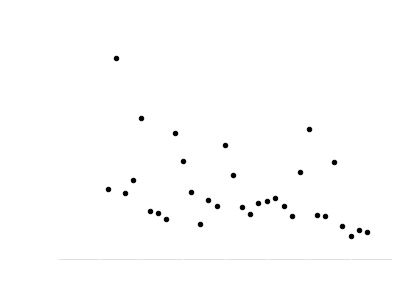

In [436]:
plt.scatter(range(1,33), counts_average, color = "black")
plt.axhline(y = 0, linewidth = 0.25, color = "k")
#plt.xticks(range(1,33), rotation=90)
plt.xlabel("Triplet")
plt.ylabel("Change in Triplet Count")
plt.title("Change in Triplet Count (triplets ranked) \n"+sim_details)
plt.show()

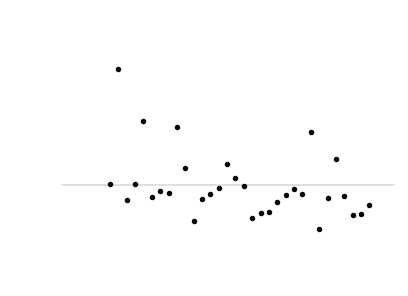

In [400]:
plt.scatter(range(1,33), counts_average, color = "black")
plt.axhline(y = 0, linewidth = 0.25, color = "k")
#plt.xticks(range(1,33), rotation=90)
plt.xlabel("Triplet")
plt.ylabel("Change in Triplet Count")
plt.title("Change in Triplet Count (triplets ranked) \n"+sim_details)
plt.show()

In [ ]:
counts_average_

In [431]:
plt.scatter(range(1,33), counts_average-fI, color = "black")
plt.axhline(y = 0, linewidth = 0.25, color = "k")
#plt.xticks(range(1,33), rotation=90)
plt.xlabel("Triplet")
plt.ylabel("Change in Triplet Count")
plt.title("Change in Triplet Count (triplets ranked) \n"+sim_details)

#plt.errorbar(range(1,33), counts_average,counts_SD)
plt.show()

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [402]:
sorted_weights = [value[0] for value in model.values()]
sorted_weights.sort()
print(sorted_weights)

[0.30323054331864907, 0.3198252625708709, 0.3202682875707399, 0.35645079041305455, 0.36173285198555954, 0.38170347003154576, 0.3860215053763441, 0.38808618504435993, 0.3978541712283775, 0.3995351785336996, 0.4073735527117611, 0.4143262045864468, 0.44338655339094774, 0.4466903598400711, 0.4589957500393515, 0.4717741935483871, 0.48758198043221157, 0.49819102749638206, 0.5081906865451868, 0.5123493090267568, 0.5196784458214705, 0.5261127596439169, 0.544423228125351, 0.5453669813138123, 0.5516478655164787, 0.5527913809990206, 0.5741935483870968, 0.6345660930062248, 0.9197916666666667, 0.9428571428571428, 0.943577893317928, 0.9583888149134487]


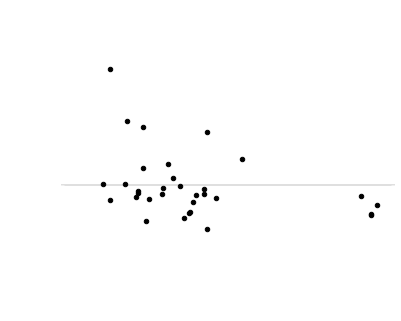

In [403]:
plt.scatter(sorted_weights, counts, color = "black")
plt.axhline(y = 0, linewidth = 0.25, color = "k")
plt.xticks(sorted_weights, rotation=90)
plt.xlabel("Triplet")
plt.ylabel("Change in Triplet Count")
plt.title("Change in Triplet Count (triplet mutability value) \n" + sim_details)
plt.show()

# ** appendix ** 

In [107]:
with open("ScriptTrial1_exonMut_cds_invariant50.txt") as file:
    content = file.readlines()
    exon_mut = content[0]
exon_mut= exon_mut.strip("[")
exon_mut= exon_mut.strip("]")
exon_mut = exon_mut.split(", ")
exon_mut = [float(value) for value in exon_mut]
    
with open("ScriptTrial1_intronMut_cds_invariant50.txt") as file:
    content = file.readlines()
    intron_mut = content[0]
intron_mut= intron_mut.strip("[")
intron_mut= intron_mut.strip("]")
intron_mut = intron_mut.split(", ")
intrxon_mut = [float(value) for value in intron_mut]

In [ ]:
with open("ScriptTrial1_DNA_gen0_cds.txt") as file:
    content = file.readlines()
    DNAI = content[0]
cds_pos_dictionary = open("ScriptTrial1_exon_insertion_dict.txt").readlines()[0]
cds_pos_dictionary = json.loads(cds_pos_dictionary)
cds_seq_dictionary = open("ScriptTrial1_exons_toUseSeqeunce_dict.txt").readlines()[0]
cds_seq_dictionary = json.loads(cds_seq_dictionary)

In [129]:
with open("ScriptTrial1_DNA_gen0_cds.txt") as file:
    content = file.readlines()
    DNAI = content[0]
cds_pos_dictionary = open("ScriptTrial1_exon_insertion_dict.txt").readlines()[0]
cds_pos_dictionary = json.loads(cds_pos_dictionary)
cds_seq_dictionary = open("ScriptTrial1_exons_toUseSeqeunce_dict.txt").readlines()[0]
cds_seq_dictionary = json.loads(cds_seq_dictionary)

57159
ENST00000282633.10
66185
ENST00000637432.1
98837
ENST00000382111.6
24978
ENST00000621144.4
34574
ENST00000513349.5
14821
ENST00000641654.1
43588
ENST00000566586.5
87327
ENST00000637569.1
77986
ENST00000674209.1
5000
ENST00000395891.7


In [26]:
print(triplets)

['GAA', 'AAA', 'GAG', 'AAG', 'CAA', 'GAC', 'TAA', 'TAG', 'AAC', 'CAC', 'CAG', 'TAC', 'TCA', 'GAT', 'CCA', 'TCT', 'AAT', 'GCA', 'GCT', 'CCT', 'TCC', 'ACT', 'TAT', 'CCC', 'ACA', 'GCC', 'CAT', 'ACC', 'TCG', 'GCG', 'CCG', 'ACG']


In [27]:
print(fI_counts)

[3123, 2811, 3758, 3452, 2897, 2820, 2359, 2276, 2542, 3476, 4924, 2329, 3130, 2583, 4009, 3417, 2385, 3801, 4013, 4065, 3665, 2915, 2164, 4419, 2995, 4317, 2638, 2939, 2073, 2683, 2847, 2318]


In [28]:
print(fF_counts)

[3139, 9127, 2985, 3572, 6397, 2178, 2055, 1750, 5610, 4461, 3014, 1610, 2752, 2544, 5183, 3718, 2409, 2066, 2565, 2640, 2821, 2398, 1981, 3874, 5827, 1952, 1956, 4356, 1556, 1063, 1306, 1278]


In [29]:
print(counts)

[16, 6316, -773, 120, 3500, -642, -304, -526, 3068, 985, -1910, -719, -378, -39, 1174, 301, 24, -1735, -1448, -1425, -844, -517, -183, -545, 2832, -2365, -682, 1417, -517, -1620, -1541, -1040]


In [30]:
print(triplets)

['GAA', 'AAA', 'GAG', 'AAG', 'CAA', 'GAC', 'TAA', 'TAG', 'AAC', 'CAC', 'CAG', 'TAC', 'TCA', 'GAT', 'CCA', 'TCT', 'AAT', 'GCA', 'GCT', 'CCT', 'TCC', 'ACT', 'TAT', 'CCC', 'ACA', 'GCC', 'CAT', 'ACC', 'TCG', 'GCG', 'CCG', 'ACG']


In [80]:
index_tmp

1

In [82]:
open(file_path_afterSim+file_name).readlines()[0][0:70]

'[0.49575078840730813, 0.4957471913996004, 0.4957471913996004, 0.495747'

In [ ]:
names_and_files_dict_averaging = {"avMutability":av_mutability_dataDict, "exonMut":exon_mutability_dataDict, "intronMut":intron_mutability_dataDict, "DNA_final": DNAF_dataDict}

for data_name, data_dict in names_and_files_dict.items(): 
    if data_name == "DNA_final": 
        for index_tmp in range(1,nTrials+1):
            file_name = sim_name_afterSim+str(index_tmp)+"_"+data_name+about_sim+".txt"
            data_dict["Trial"+str(index_tmp)] = open(file_path_afterSim+file_name).readlines()[0]
    else: 
        for index_tmp in range(1,nTrials+1): 
            file_name = sim_name_afterSim+str(index_tmp)+"_"+data_name+about_sim+".txt"
            data_dict["Trial"+str(index_tmp)] = open(file_path_afterSim+file_name).readlines()[0]
            data_dict["Trial"+str(index_tmp)] = data_dict["Trial"+str(index_tmp)].strip("[")
            data_dict["Trial"+str(index_tmp)] = data_dict["Trial"+str(index_tmp)].strip("]")
            data_dict["Trial"+str(index_tmp)] = data_dict["Trial"+str(index_tmp)].split(",")
            data_dict["Trial"+str(index_tmp)] = [float(value) for value in data_dict["Trial"+str(index_tmp)]]


In [ ]:
DNAF = open(file_path_afterSim+sim_name_afterSim+"_DNA_final_cds_invariant50.txt").readlines()[0]

av_mutability = open(file_path_afterSim+sim_name_afterSim+"_avMutability_cds_invariant50.txt").readlines()[0]
av_mutability = av_mutability.strip("[")
av_mutability = av_mutability.strip("]")
av_mutability = av_mutability.split(", ")
av_mutability = [float(value) for value in av_mutability]

exon_mutability = open(file_path_afterSim+sim_name_afterSim+"_exonMut_cds_invariant50.txt").readlines()[0]
exon_mutability= exon_mutability.strip("[")
exon_mutability= exon_mutability.strip("]")
exon_mutability = exon_mutability.split(", ")
exon_mutability = [float(value) for value in exon_mutability]

intron_mutability = open(file_path_afterSim+sim_name_afterSim+"_intronMut_cds_invariant50.txt").readlines()[0]
intron_mutability= intron_mutability.strip("[")
intron_mutability= intron_mutability.strip("]")
intron_mutability = intron_mutability.split(", ")
intron_mutability = [float(value) for value in intron_mutability]

In [92]:
DNA_length = len(DNAF_dataDict["Trial1"])
for DNA_listValue in DNAF_dataDict.values():
    for i in range(1,DNA_length-1): # dont want it to run all the way to the end: need to -1 so last centre index is second last in DNA string 
        if (DNA_listValue[0][i-1:i+2]) in model: 
            DNA_listValue[1].append(model[(DNAF[i-1:i+2])][0])
        else: 
            DNA_listValue[1].append(model[reverse_complement(DNAF[i-1:i+2])][0])
    

In [98]:
(DNAF[i-1:i+2])

'GAG'

In [96]:
DNAF_dataDict["Trial1"][0][0:15]

'CGGTTTGGAGGAGGG'

In [ ]:
weights_final = []
for i in range(1,len(DNAF)-1): # dont want it to run all the way to the end: need to -1 so last centre index is second last in DNA string 
    if (DNAF[i-1:i+2]) in model: 
        weights_final.append(model[(DNAF[i-1:i+2])][0])
    else: 
        weights_final.append(model[reverse_complement(DNAF[i-1:i+2])][0])
print(weights_final[0:10])

In [62]:
sliding_window_X = []
sliding_window_avMut = []
sliding_window_SD = []

window_size = 1000 

for i in range(0, len(DNAF), window_size): 
    if len(DNAF) - i < window_size: 
        print("lenght of window = "+str(len(DNAF)-i))
        print("lenght of dna = "+str(len(DNAF)))
        break 
    sliding_window_X.append(i)
    
    window_meanMut = numpy.mean(weights_final[i:i+window_size])
    sliding_window_avMut.append(window_meanMut)
    
    window_sdMut = numpy.sd(weights_final[i:i+window_size])
    sliding_window_SD.append(window_sdMut)

lenght of window = 145
lenght of dna = 100145


In [232]:
numpy.mean(trial_list)

0.58814012357930512

In [ ]:
model

In [165]:
DNA_length = len(DNAF_dataDict["Trial1"][0])

for DNA_listValue in DNAF_dataDict.values():
    current_DNAstring = DNA_listValue[0]
    for i in range(1,DNA_length-1): # dont want it to run all the way to the end: need to -1 so last centre index is second last pos in DNA string 
        if (current_DNAstring[i-1:i+2]) in model: 
            DNA_listValue[1].append(model[(current_DNAstring[i-1:i+2])][0])
        else: 
            DNA_listValue[1].append(model[reverse_complement(current_DNAstring[i-1:i+2])][0])

In [271]:
sliding_window_X = []
sliding_window_avMut = []
sliding_window_SD = []
window_size = 1000 

for i in range(0, DNA_length, window_size): 
    if DNA_length - i < window_size: 
        print("lenght of window = "+str(len(weights_DNAF_average)-i))
        print("lenght of dna = "+str(DNA_length))
        break 
    sliding_window_X.append(i)
    
    sliding_window_avMut.append(numpy.mean((weights_DNAF_average[i:i+window_size]))
    
    sliding_window_SD.append(numpy.std(weights_DNAF_SD[i:i+window_size]))

SyntaxError: invalid syntax (<ipython-input-271-100f5d6a3095>, line 15)

In [274]:
sliding_window_X = []
sliding_window_avMut = []
sliding_window_SD = []
window_size = 1000 

for i in range(0, DNA_length, window_size): 
    if DNA_length - i < window_size: 
        print("lenght of window = "+str(len(weights_DNAF_average)-i))
        print("lenght of dna = "+str(DNA_length))
        break 
    sliding_window_X.append(i)
    
    sliding_window_avMut.append(numpy.mean((weights_DNAF_average[i:i+window_size]))
    
    sliding_window_SD.append("1")

SyntaxError: invalid syntax (<ipython-input-274-541de53474af>, line 15)

In [377]:
# ok here I need to create lsit of triplets for every trial, then count the freq of each triplet within each thingm then average
#--> ok i know it makes more sense to go triplet by triplet, but itll be quciker to go trail by trial 
#--> for each trial make... a list of the occurences of each triplet? (will be in the same order so just work on that)

# sorted model = ascending lsit mutabilities 
# triplets + list al triplets by mutability. 

#PLAN: using th eordered triplet list as iterator 
fF_counts = [0 for i in range(0,len(triplets))]

for i in range(1,nTrials+1):
    trial_name = "Trial{n}".format(n=i)
    triplets_thisTrial = []
    DNAF_thisTrial = DNAF_dataDict[trial_name]
    for site in range(1,len(DNAI)-1): 
        triplets_thisTrial.append(DNAF_thisTrial[site-1:site+2])

    for index,triplet in enumerate(triplets): 
        fF_counts[index] += triplets_thisTrial.count(triplet)
    print(fF_counts[0:10])  


[801, 393, 2016, 787, 284, 625, 469, 1143, 220, 227]
[1597, 757, 3976, 1531, 547, 1210, 982, 2351, 451, 460]
[2425, 1134, 5955, 2320, 816, 1840, 1475, 3570, 695, 695]
[3228, 1516, 8007, 3084, 1081, 2468, 1951, 4765, 914, 924]
[4014, 1896, 10057, 3824, 1358, 3055, 2429, 5957, 1118, 1144]
[4851, 2267, 11999, 4612, 1620, 3655, 2890, 7190, 1344, 1380]
[5668, 2663, 13926, 5352, 1896, 4281, 3345, 8409, 1562, 1628]
[6484, 3070, 15925, 6100, 2158, 4898, 3803, 9595, 1794, 1848]
[7288, 3424, 17937, 6870, 2421, 5486, 4284, 10869, 2012, 2053]
[8118, 3835, 19876, 7610, 2677, 6115, 4784, 12110, 2234, 2304]


# ** oldmethod getting sdiing window: high varianc e** 

# ** Sliding window (same dna string) ** 

In [15]:
weights_DNAF_average = []
weights_DNAF_SE= []

for i in range(1,len(weights_initial)):
    trial_list = []
    for trial in range(1,nTrials+1): 
        trial_name = "Trial{n}".format(n=trial)
        triplet = DNAF_dataDict[trial_name][i-1:i+2]
        if triplet in model: 
            trial_list.append(model[triplet][0])
        else: 
            trial_list.append(model[reverse_complement(triplet)][0])
    
    weights_DNAF_average.append(numpy.mean(trial_list))
    weights_DNAF_SE.append(numpy.std(trial_list)/numpy.sqrt(nTrials))


In [16]:
print(weights_DNAF_average[0:10])
print(weights_DNAF_SE[0:10])

[0.94357789331792785, 0.55820060272930772, 0.42792866378390726, 0.48687265122939971, 0.46600363893439223, 0.39333993088604213, 0.40837883537115188, 0.42111543992924921, 0.48423044710735019, 0.51420838450930462]
[3.2049378106392736e-17, 0.013255703755728987, 0.020896147468997876, 0.048963146530445138, 0.049090042097546499, 0.019906833902612695, 0.022224380010165377, 0.026208142802242432, 0.045395625558013943, 0.040915503894795112]


In [48]:
print(weights_DNAF_average[0:10])
print(weights_DNAF_SE[0:10])

[0.94357789331792818, 0.59000966279646716, 0.46191566660440597, 0.429063289711276, 0.46911987330357385, 0.43161015937504449, 0.44715776673214158, 0.46123366631760654, 0.46017745594462861, 0.45143483931234157]
[4.0539612963254114e-17, 0.0088358160644888151, 0.017014191256769146, 0.016198390400226491, 0.024078864024587046, 0.02132217013805154, 0.018079815979723132, 0.016447942296660086, 0.018919678283537127, 0.015582058584134853]


___

In [49]:
sliding_window_X = []
sliding_window_avMut = []
sliding_window_SE = []
window_size = 1000 


for i in range(0,len(DNAI), window_size):                                  # 1[len(dnai)] iterating by window size 
    if len(DNAI) - i > window_size:                                        # if you're not RIGHT at the end 
        sliding_window_X.append(i+int(window_size/2))                      # append the middle of the sliding window region to sliding_window_X
        
        lstAvValuesInWindow = weights_DNAF_average[i:i+window_size]        # 
        sliding_window_avMut.append(numpy.mean(lstAvValuesInWindow))
        
        lstSDValuesInWindow = weights_DNAF_SE[i:i+window_size]
        sliding_window_SE.append(numpy.mean(lstSDValuesInWindow))
    else: 
        print("size of omitted section is : "+str(len(DNAI)-i))


size of omitted section is : 145


In [51]:
#do a double check after file imports 
for gene_id, gene_value in cds_seq_dictionary.items():     
    if DNAI.find(gene_value[0]) != cds_pos_dictionary[gene_id][0]+1: 
        print("ERROR: cds_pos_dict not accurate for this dna for "+gene_id)


In [52]:
cds_pos_list = []
for value in cds_pos_dictionary.values(): 
    cds_pos_list.extend([value[0], value[1]])
cds_pos_list.sort()

In [53]:
print(cds_pos_list)

[7141, 11479, 18621, 23421, 30563, 35810, 42952, 54730, 61872, 68859, 76001, 80708, 87850, 100144]


In [54]:
sliding_aboveError = numpy.array(sliding_window_avMut)+numpy.array(sliding_window_SE)
sliding_belowError = numpy.array(sliding_window_avMut)-numpy.array(sliding_window_SE)
print(type(sliding_belowError))
print(type(sliding_aboveError))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


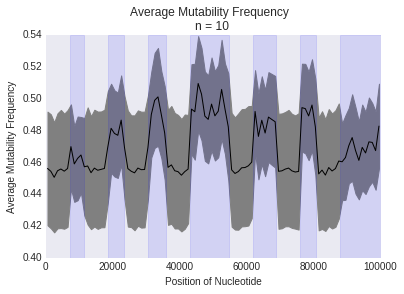

In [40]:
#details you want to be in graph titles
sim_details = "n = 10 "

#this chunck is just plotting
fig, ax = plt.subplots()
plt.plot(sliding_window_X, sliding_window_avMut, "k")
#plt.plot(sliding_window_avMut, sliding_aboveError, "k")
plt.title("Average Mutability Frequency  \n"+sim_details)
plt.xlabel("Position of Nucleotide")
plt.ylabel("Average Mutability Frequency")

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.1, color='blue')
ax.grid(False)
#adding in SD 
plt.fill_between(sliding_window_X,sliding_belowError,sliding_aboveError, color = "grey")
plt.xlim(right=100000)  # adjust the right leaving left unchanged
plt.show()

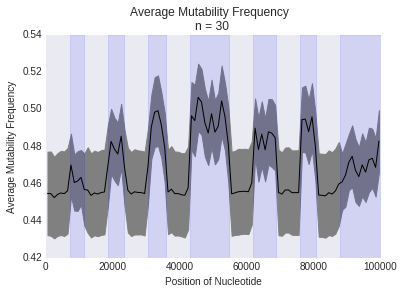

In [56]:
#details you want to be in graph titles
sim_details = "n = 30 "

#this chunck is just plotting
fig, ax = plt.subplots()
plt.plot(sliding_window_X, sliding_window_avMut, "k")
#plt.plot(sliding_window_avMut, sliding_aboveError, "k")
plt.title("Average Mutability Frequency  \n"+sim_details)
plt.xlabel("Position of Nucleotide")
plt.ylabel("Average Mutability Frequency")

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.1, color='blue')
ax.grid(False)
#adding in SD 
plt.fill_between(sliding_window_X,sliding_belowError,sliding_aboveError, color = "grey")
plt.xlim(right=100000)  # adjust the right leaving left unchanged
plt.show()

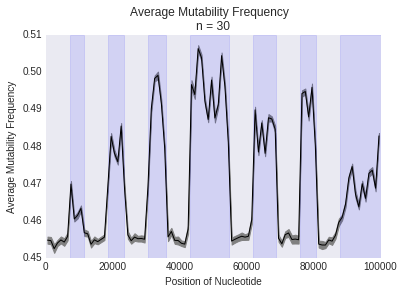

In [117]:
#details you want to be in graph titles
sim_details = "n = 12"

#this chunck is just plotting
fig, ax = plt.subplots()
plt.plot(sliding_window_X, sliding_window_avMut, "k")
#plt.plot(sliding_window_avMut, sliding_aboveError, "k")
plt.title("Average Mutability Frequency  \n"+sim_details)
plt.xlabel("Position of Nucleotide")
plt.ylabel("Average Mutability Frequency")

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.1, color='blue')
ax.grid(False)
#adding in SD 
plt.fill_between(sliding_window_X,sliding_belowError,sliding_aboveError, color = "grey")

plt.xlim(right=100000)  # adjust the right leaving left unchanged
plt.show()

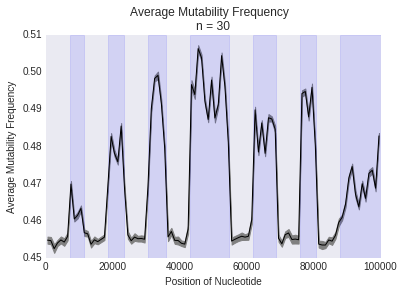

In [128]:
#details you want to be in graph titles
sim_details = "n = 30"

#this chunck is just plotting
fig, ax = plt.subplots()
plt.plot(sliding_window_X, sliding_window_avMut, "k")
#plt.plot(sliding_window_avMut, sliding_aboveError, "k")
plt.title("Average Mutability Frequency  \n"+sim_details)
plt.xlabel("Position of Nucleotide")
plt.ylabel("Average Mutability Frequency")

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.1, color='blue')
ax.grid(False)
#adding in SD 
plt.fill_between(sliding_window_X,sliding_belowError,sliding_aboveError, color = "grey")

plt.xlim(right=100000)  # adjust the right leaving left unchanged

plot_save_path = "Plots/"
plot_details = "SlidingWindow_n30_averagedWithinStringThenAcrosstrials_windowSize1k"
plt.savefig(plot_save_path+plot_details+".png")

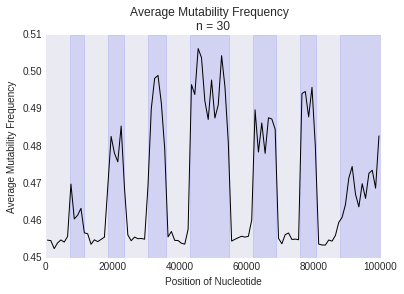

In [115]:
#details you want to be in graph titles
sim_details = "n = 30"

#this chunck is just plotting
fig, ax = plt.subplots()
plt.plot(sliding_window_X, sliding_window_avMut, "k")
#plt.plot(sliding_window_avMut, sliding_aboveError, "k")
plt.title("Average Mutability Frequency  \n"+sim_details)
plt.xlabel("Position of Nucleotide")
plt.ylabel("Average Mutability Frequency")

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.1, color='blue')
ax.grid(False)
#adding in SD 
plt.fill_between(sliding_window_X,sliding_belowError,sliding_aboveError, color = "grey")

plt.xlim(right=100000)  # adjust the right leaving left unchanged
plt.show()

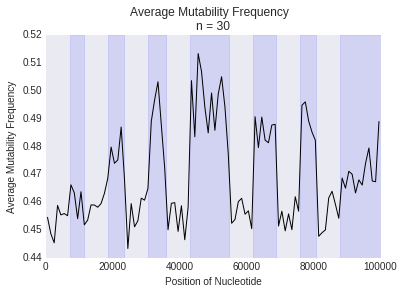

In [102]:
#details you want to be in graph titles
sim_details = "n = 30"

#this chunck is just plotting
fig, ax = plt.subplots()
plt.plot(sliding_window_X, sliding_window_avMut, "k")
#plt.plot(sliding_window_avMut, sliding_aboveError, "k")
plt.title("Average Mutability Frequency  \n"+sim_details)
plt.xlabel("Position of Nucleotide")
plt.ylabel("Average Mutability Frequency")

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.1, color='blue')
ax.grid(False)
#adding in SD 
plt.xlim(right=100000)  # adjust the right leaving left unchanged
plt.show()

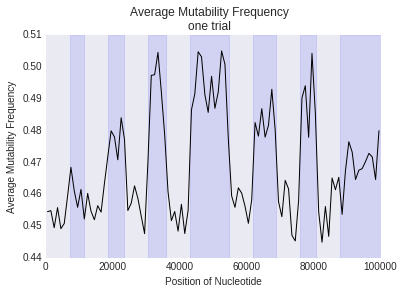

In [92]:
#details you want to be in graph titles
sim_details = "one trial  "

#this chunck is just plotting
fig, ax = plt.subplots()
plt.plot(sliding_window_X, trial_muts_list, "k")
#plt.plot(sliding_window_avMut, sliding_aboveError, "k")
plt.title("Average Mutability Frequency  \n"+sim_details)
plt.xlabel("Position of Nucleotide")
plt.ylabel("Average Mutability Frequency")

# LINES SHOWING WHERE THE CODING AND NON-CODING REGIONS ARE 
for index in range(0,len(cds_pos_list), 2): 
    ax.axvspan(cds_pos_list[index], cds_pos_list[index+1], alpha=0.1, color='blue')
ax.grid(False)
#adding in SD 
plt.xlim(right=100000)  # adjust the right leaving left unchanged
plt.show()